In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import os

# For data preparation
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# For Tensorflow
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, MaxPool2D, GlobalAvgPool2D, Conv2D, Dropout, BatchNormalization

# for callback
from tensorflow.keras.callbacks import ModelCheckpoint

# Deep insight
from pyDeepInsight import ImageTransformer, LogScaler

In [3]:
monCapteur = pd.read_csv("./capteurs/capteur1.csv")
monCapteur

,0,1,2,3,4,5,6,7,8,9,...,3991,3992,3993,3994,3995,3996,3997,3998,3999,class
0,0.361,0.361,0.361,0.361,0.361,0.361,0.361,0.361,0.361,0.361,...,0.405,0.405,0.405,0.405,0.405,0.405,0.405,0.405,0.405,smoker
1,0.365,0.365,0.365,0.365,0.365,0.365,0.365,0.365,0.365,0.365,...,0.366,0.366,0.366,0.366,0.366,0.366,0.366,0.366,0.366,smoker
2,0.371,0.371,0.371,0.371,0.371,0.371,0.371,0.371,0.371,0.371,...,0.360,0.360,0.360,0.360,0.360,0.360,0.360,0.360,0.360,smoker
3,0.346,0.346,0.346,0.346,0.346,0.346,0.346,0.346,0.346,0.346,...,0.392,0.392,0.392,0.392,0.392,0.392,0.392,0.392,0.392,smoker
4,0.311,0.311,0.310,0.310,0.311,0.311,0.311,0.311,0.310,0.310,...,0.342,0.342,0.342,0.342,0.342,0.342,0.342,0.342,0.342,smoker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,0.534,0.534,0.534,0.533,0.534,0.534,0.534,0.534,0.534,0.534,...,0.534,0.534,0.534,0.534,0.534,0.534,0.534,0.534,0.534,air
74,0.528,0.528,0.528,0.528,0.528,0.528,0.528,0.528,0.528,0.528,...,0.536,0.536,0.536,0.536,0.536,0.536,0.536,0.536,0.536,air
75,0.542,0.542,0.542,0.542,0.542,0.542,0.542,0.542,0.542,0.542,...,0.537,0.537,0.537,0.537,0.537,0.537,0.537,0.537,0.537,air
76,0.532,0.532,0.532,0.532,0.532,0.532,0.532,0.532,0.532,0.532,...,0.533,0.534,0.534,0.533,0.533,0.532,0.533,0.534,0.534,air


In [5]:
features = monCapteur.copy()
label = features["class"].astype("category").cat.codes
features.drop(["class"], inplace=True, axis=1)
label

0     3
1     3
2     3
3     3
4     3
     ..
73    0
74    0
75    0
76    0
77    0
Length: 78, dtype: int8

In [6]:
fv_train, fv_test, etiq_train, etiq_test = train_test_split(features, label, test_size=0.3, random_state=42)

In [7]:
fv_train.shape

(54, 4000)

On va appliquer un scaling pour uniformiser nos données

In [9]:
ln = LogScaler()
fv_train_norm = ln.fit_transform(fv_train)
fv_test_norm = ln.transform(fv_test)

On va initialiser le générateur d'images, il y a trois méthodes de features extraction disponibles : 
* tsne
* pca
* kpca

In [10]:
it = ImageTransformer(feature_extractor='tsne', 
                      pixels=50, random_state=1701, 
                      n_jobs=-1)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


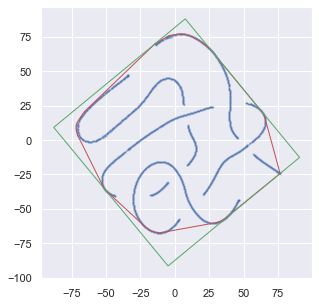

In [13]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(5, 5))
_ = it.fit(fv_train_norm, plot=True)

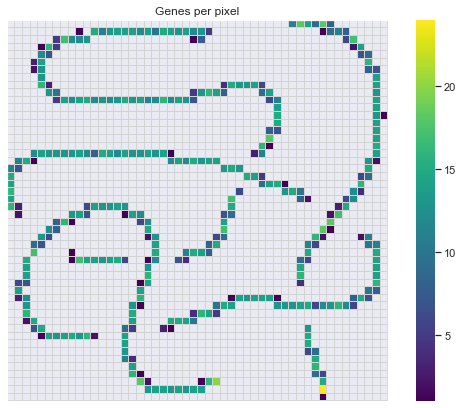

In [16]:
fdm = it.feature_density_matrix()
fdm[fdm == 0] = np.nan

plt.figure(figsize=(10, 7))

ax = sns.heatmap(fdm, cmap="viridis", linewidths=0.01, 
                 linecolor="lightgrey", square=True)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
for _, spine in ax.spines.items():
    spine.set_visible(True)
_ = plt.title("Genes per pixel")

In [17]:
fv_train_img = it.fit_transform(fv_train_norm)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


In [18]:
fv_train_img.shape

(54, 50, 50, 3)

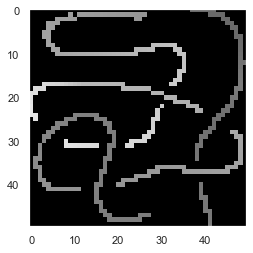

In [22]:
plt.imshow(fv_train_img[40])
plt.grid(False)

In [23]:
fv_test_img = it.fit_transform(fv_test_norm)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


## CNN

Epoch 1/50
11/11 [==============================] - ETA: 0s - loss: 1.2229 - accuracy: 0.6047
Epoch 1: accuracy improved from -inf to 0.60465, saving model to .\Model_CNN_deepinsight
INFO:tensorflow:Assets written to: .\Model_CNN_deepinsight\assets
11/11 [==============================] - 10s 712ms/step - loss: 1.2229 - accuracy: 0.6047 - val_loss: 1.3653 - val_accuracy: 0.2727
Epoch 2/50
11/11 [==============================] - ETA: 0s - loss: 0.9426 - accuracy: 0.6512
Epoch 2: accuracy improved from 0.60465 to 0.65116, saving model to .\Model_CNN_deepinsight
INFO:tensorflow:Assets written to: .\Model_CNN_deepinsight\assets
11/11 [==============================] - 7s 652ms/step - loss: 0.9426 - accuracy: 0.6512 - val_loss: 1.2465 - val_accuracy: 0.7273
Epoch 3/50
11/11 [==============================] - ETA: 0s - loss: 0.9470 - accuracy: 0.6279
Epoch 3: accuracy did not improve from 0.65116
11/11 [==============================] - 1s 131ms/step - loss: 0.9470 - accuracy: 0.6279 - val_

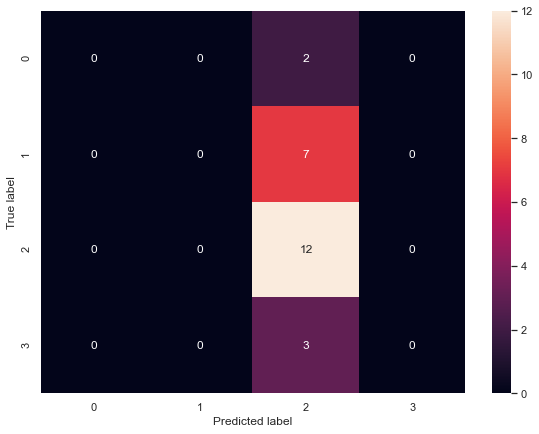

In [30]:
path_to_save_model = './Model_CNN_deepinsight'

ckpt_saver = ModelCheckpoint(
path_to_save_model,
monitor='accuracy', # sur quoi on se base pour voir le meilleur
mode = 'max', # max de l'accuracy sur la validation
save_best_only = True,
save_freq='epoch', # ne voit qu'à la fin de l'époque
verbose=1) 

model = tf.keras.Sequential(
    [
        Input(shape=(50,50,3)), # format d'entrée
        Conv2D(32, (5,5), activation='relu'), # 32 filtres de taille 3x3 avec une fonction d'activation relu
        Conv2D(64, (5,5), activation='relu'),
        Dropout(0.5),
        MaxPool2D(pool_size=2),
        BatchNormalization(),
        Conv2D(128, (5,5), activation='relu'),
        Dropout(0.5),
        MaxPool2D(pool_size=2),
        BatchNormalization(),

        GlobalAvgPool2D(),
        Dense(64, activation='relu'),
        Dense(4, activation='softmax') # Couche finale (softmax pour faire une classification multi classe), on choisit 10 car il y a 10 classes !!
    ]
)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(fv_train_img, etiq_train, batch_size=4, epochs=50, validation_split=0.2, callbacks=[ckpt_saver])

# Evaluation of the model
print("\n\n==================================== Modele evaluation ====================================")
model.evaluate(fv_test_img,etiq_test, batch_size=4)
print("===========================================================================================\n\n")
y_model=model.predict(fv_test_img)
y_model_max = np.argmax(y_model, axis=1)
con_mat = tf.math.confusion_matrix(labels=etiq_test, predictions=y_model_max).numpy()

# Visualization
sns.set_theme(style='darkgrid')
plt.figure(figsize=(8, 6))
sns.heatmap(con_mat, annot=True)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [33]:
etiq_train.value_counts()

2    28
1    13
0     8
3     5
dtype: int64